In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import copy
from math import sqrt,ceil

#from rope.base.oi.soa import analyze_module
from scipy.stats import linregress
import libraries as lib

C:\Users\quinc\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [26]:
directory = "../../../OneDrive - HvA/Logfiles/SOLAR/2024/20240701_20240707_monaco/20240705_endurance/0201 - 20240705T163208 13m40s 3.643km Monte-Carlo"
file_accu = "8_Accu_09_04.csv"
file_master = "9_Master_08_05.csv"

In [27]:
data_file_accu = lib.DataInladen(f'{directory}/{file_accu}',debug=False)
data_file_master = lib.DataInladen(f'{directory}/{file_master}',debug=False)

In [35]:
display(data_file_accu)
display(data_file_master)

,Datalogger port,"Dataloggertijd, in s",Format header (>09|04),Tijd sinds boot in seconden,tijd,Datum,Cel spanning van cel 1,Cel spanning van cel 2,Cel spanning van cel 3,Cel spanning van cel 4,...,Charge 4 spanning,Charge 4 stroom,Charge 5 spanning,Charge 5 stroom,Discharge 0 spanning,Discharge 0 stroom,Discharge 1 spanning,Discharge 1 stroom,"I’m, welke accu ben ik",MEAS
0,8,44.7954,09|04,18214.145,162405,240705,3.293,3.320,3.318,3.306,...,34.4,-0.026,0.4,-0.103,10.4,-0.063,0.4,-0.031,C,NaN
1,8,44.9197,09|04,18214.270,162405,240705,3.294,3.320,3.317,3.306,...,34.4,-0.026,0.4,-0.103,10.4,-0.063,0.4,-0.031,C,NaN
2,8,45.1704,09|04,18214.520,162405,240705,3.307,3.334,3.330,3.328,...,34.4,-0.026,0.4,-0.103,10.4,-0.063,0.4,-0.031,C,NaN
3,8,45.2947,09|04,18214.645,162405,240705,3.307,3.335,3.330,3.328,...,34.4,-0.026,0.4,-0.103,10.4,-0.063,0.4,-0.031,C,NaN
4,8,45.4200,09|04,18214.770,162405,240705,3.308,3.335,3.330,3.328,...,34.4,-0.026,0.4,-0.103,10.4,-0.063,0.4,-0.031,C,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6646,8,895.0450,09|04,19064.395,163815,240705,3.274,3.285,3.283,3.281,...,34.4,-0.027,0.4,-0.104,8.1,-0.067,0.4,-0.030,C,NaN
6647,8,895.1703,09|04,19064.520,163815,240705,3.275,3.285,3.283,3.281,...,34.4,-0.027,0.4,-0.104,8.1,-0.067,0.4,-0.030,C,NaN
6648,8,895.2947,09|04,19064.645,163815,240705,3.274,3.285,3.283,3.281,...,34.4,-0.027,0.4,-0.104,8.1,-0.067,0.4,-0.030,C,NaN
6649,8,895.4201,09|04,19064.770,163815,240705,3.274,3.285,3.283,3.281,...,34.4,-0.027,0.4,-0.104,8.1,-0.067,0.4,-0.030,C,NaN


,Datalogger port,"Dataloggertijd, in s",Format header (>08|05),Cycle count,Tijd,Status,Latitude,Noord of Zuid (N/S),Longitude,Oost of West (E/W),Snelheid over de grond in km/h,Richting van de snelheid,Datum,Magnetische variatie,Magnetische directie,Mode indicator (D),Data in balancers [Case H2a solution -> (000000000000),Snelheid tenopzichte van het water in Kilometers per uur,Board Temperature
0,9,47.0331,08|05,2.034,115946.0,V,0.0000,N,0.0000,E,0.0,0.0,280606,NaN,NaN,N,0,0.00,38.6
1,9,48.0356,08|05,3.035,115947.0,V,0.0000,N,0.0000,E,0.0,0.0,280606,NaN,NaN,N,0,0.00,40.1
2,9,49.0549,08|05,4.055,115948.0,V,0.0000,N,0.0000,E,0.0,0.0,280606,NaN,NaN,N,0,0.00,40.4
3,9,50.0392,08|05,5.040,115949.0,V,0.0000,N,0.0000,E,0.0,0.0,280606,NaN,NaN,N,0,0.00,40.4
4,9,51.0400,08|05,6.040,115950.0,V,0.0000,N,0.0000,E,0.0,0.0,280606,NaN,NaN,N,0,0.00,40.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,9,869.6597,08|05,824.783,144544.0,A,4344.4309,N,726.1276,E,17.0,241.7,50724,NaN,NaN,D,0,14.00,40.8
819,9,870.6528,08|05,825.776,144545.0,A,4344.4297,N,726.1244,E,17.2,241.5,50724,NaN,NaN,D,0,14.20,40.7
820,9,871.6708,08|05,826.794,144546.0,A,4344.4284,N,726.1211,E,18.0,240.1,50724,NaN,NaN,D,0,14.41,40.8
821,9,872.6617,08|05,827.785,144547.0,A,4344.4271,N,726.1181,E,17.6,242.0,50724,NaN,NaN,D,0,14.54,40.7


In [29]:
# Apply the function using the correct time columns
merged_df = lib.resample_and_merge(data_file_master, data_file_accu, freq='1s')
merged_df

,Datalogger port_df1,Cycle count,Tijd,Latitude,Longitude,Snelheid over de grond in km/h,Richting van de snelheid,Datum_df1,Magnetische variatie,Magnetische directie,...,Charge 5 stroom,Discharge 0 spanning,Discharge 0 stroom,Discharge 1 spanning,MEAS,Format header (>09|04),aantal ontlaadpaden,Laatste hardware fout type met tijd en datum,Discharge 1 stroom,"I’m, welke accu ben ik"
"Dataloggertijd, in s",,,,,,,,,,,,,,,,,,,,,
0 days 00:00:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.103000,10.4000,-0.063000,0.4000,NaN,09|04,2,OT,-0.031,C
0 days 00:00:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.103000,10.4000,-0.063000,0.4000,NaN,09|04,2,OT,-0.031,C
0 days 00:00:47,9.0,2.034,115946.0,0.0,0.0,0.0,0.0,280606.0,NaN,NaN,...,-0.075000,24.1375,0.370125,22.1000,NaN,09|04,2,OT,-0.031,C
0 days 00:00:48,9.0,3.035,115947.0,0.0,0.0,0.0,0.0,280606.0,NaN,NaN,...,-0.071000,26.1000,0.432000,25.2000,NaN,09|04,2,OT,0.118,C
0 days 00:00:49,9.0,4.055,115948.0,0.0,0.0,0.0,0.0,280606.0,NaN,NaN,...,-0.064875,28.9875,0.388250,29.4875,NaN,09|04,2,OT,0.118,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 00:14:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.104000,8.1000,-0.066000,0.5000,NaN,09|04,2,OT,-0.031,C
0 days 00:14:53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.104875,8.1000,-0.066875,0.4125,NaN,09|04,2,OT,-0.031,C
0 days 00:14:54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.105000,8.1000,-0.067000,0.4000,NaN,09|04,2,OT,-0.031,C


In [33]:
xas = 'Snelheid over de grond in km/h'
yas = 'Discharge 1 stroom'
#zas = ''
# I only want the rows where discharge 1 stroom has a numerical value
data_file_filtered['Discharge 1 stroom'] = data_file_filtered['Discharge 1 stroom'].astype(float)
#remove data that's 0
data_file_filtered = data_file_filtered[data_file_filtered['Discharge 1 stroom'] != 0]
data_file_filtered = data_file_filtered[data_file_filtered['Snelheid over de grond in km/h'] != 0]
#data_file_filtered = merged_df[[xas, yas]].dropna()

# Now filter out the beginning and end of the data, by removing the first and last 10% of the data
from math import ceil
#data_file
#data_file = data_file.iloc[ceil(len(data_file)*0.215):ceil(len(data_file)*0.267)]

# Display the filtered data
data_file_filtered

,Snelheid over de grond in km/h,Discharge 1 stroom
"Dataloggertijd, in s",,
0 days 00:00:55,8.1,0.095
0 days 00:00:56,9.6,0.093
0 days 00:00:57,9.6,0.093
0 days 00:00:58,9.1,0.094
0 days 00:01:00,8.7,0.093
...,...,...
0 days 00:14:30,17.0,0.091
0 days 00:14:31,17.2,0.091
0 days 00:14:32,18.0,0.091


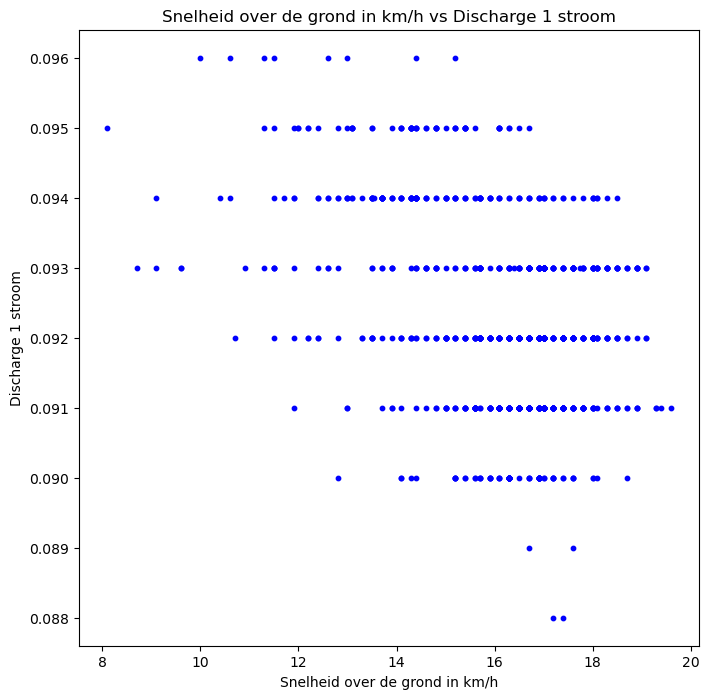

In [34]:
plotten = lib.plot_data(data_file_filtered, xas, yas)#, trendline='linear', degree=1)